In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [2]:
data = pd.read_csv(r'C:\Users\HOME\Downloads\synthetic_social_media_data.csv')


In [3]:
# Data Preprocessing
def preprocess_data(data):
    data = data[['Post Content', 'Sentiment Label']].copy()

    data.dropna(inplace=True)

    label_encoder = LabelEncoder()
    data['Sentiment Label Encoded'] = label_encoder.fit_transform(data['Sentiment Label'])

    return data, label_encoder

data, label_encoder = preprocess_data(data)


Sentiment Distribution:

Sentiment Label
Neutral     682
Negative    675
Positive    643
Name: count, dtype: int64


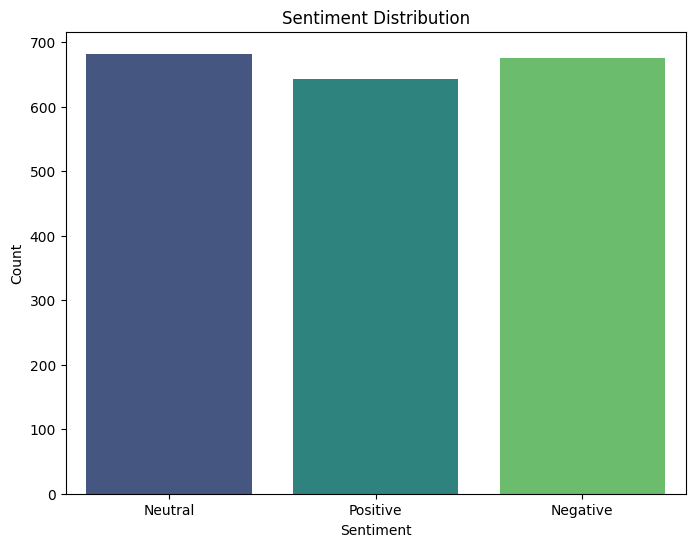

In [4]:
# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("Sentiment Distribution:\n")
    print(data['Sentiment Label'].value_counts())
    
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sentiment Label', hue='Sentiment Label', data=data, palette='viridis', dodge=False, legend=False)

    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

perform_eda(data)



Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.43      0.37       121
           1       0.35      0.31      0.33       149
           2       0.29      0.24      0.26       130

    accuracy                           0.32       400
   macro avg       0.32      0.33      0.32       400
weighted avg       0.32      0.32      0.32       400

Accuracy: 0.3225


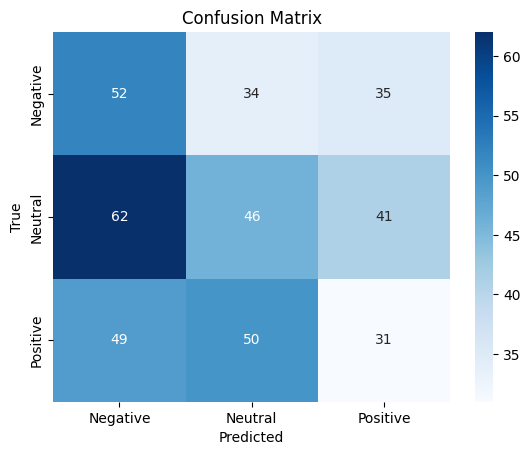

In [5]:
# Model Training
def train_model(data):
    X_train, X_test, y_train, y_test = train_test_split(
        data['Post Content'], data['Sentiment Label Encoded'], test_size=0.2, random_state=42
    )

    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return model, vectorizer

model, vectorizer = train_model(data)


In [6]:
# Prediction Function
def predict_sentiment(text, model, vectorizer, label_encoder):
    text_tfidf = vectorizer.transform([text])
    pred_label = model.predict(text_tfidf)[0]
    return label_encoder.inverse_transform([pred_label])[0]

example_text = "This product is amazing!"
predicted_sentiment = predict_sentiment(example_text, model, vectorizer, label_encoder)
print(f"Example Text: {example_text}\nPredicted Sentiment: {predicted_sentiment}")


Example Text: This product is amazing!
Predicted Sentiment: Negative


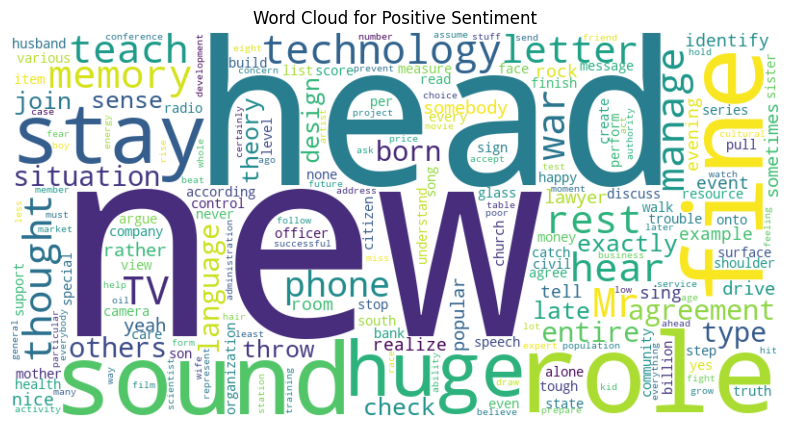

In [7]:
# Word Cloud Visualization
def generate_word_cloud(data, sentiment):
    sentiment_data = data[data['Sentiment Label'] == sentiment]

    text = " ".join(sentiment_data['Post Content'])

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

generate_word_cloud(data, 'Positive')


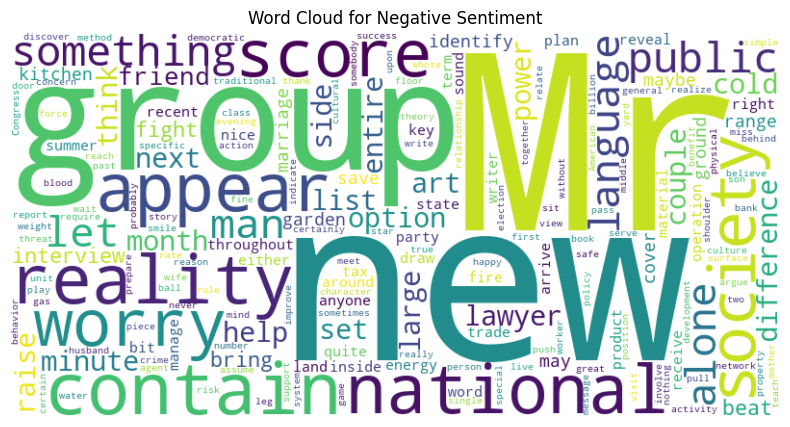

In [8]:
# Word Cloud Visualization
def generate_word_cloud(data, sentiment):
    sentiment_data = data[data['Sentiment Label'] == sentiment]

    text = " ".join(sentiment_data['Post Content'])

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

generate_word_cloud(data, 'Negative')


In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentences = [
    "I love this product! It's absolutely amazing.",
    "This is the worst experience I've ever had.",
    "It's okay, not the best but not the worst either.",
    "I feel really happy today!",
    "The service was terrible and the staff was rude."
]

for sentence in sentences:
    sentiment_scores = sia.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment Scores: {sentiment_scores}")
    print(f"Overall Sentiment: {'Positive' if sentiment_scores['compound'] > 0 else 'Negative' if sentiment_scores['compound'] < 0 else 'Neutral'}")
    print("-" * 50)


Sentence: I love this product! It's absolutely amazing.
Sentiment Scores: {'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.862}
Overall Sentiment: Positive
--------------------------------------------------
Sentence: This is the worst experience I've ever had.
Sentiment Scores: {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}
Overall Sentiment: Negative
--------------------------------------------------
Sentence: It's okay, not the best but not the worst either.
Sentiment Scores: {'neg': 0.145, 'neu': 0.464, 'pos': 0.391, 'compound': 0.5729}
Overall Sentiment: Positive
--------------------------------------------------
Sentence: I feel really happy today!
Sentiment Scores: {'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.6468}
Overall Sentiment: Positive
--------------------------------------------------
Sentence: The service was terrible and the staff was rude.
Sentiment Scores: {'neg': 0.466, 'neu': 0.534, 'pos': 0.0, 'compound': -0.7269}
Overall Sentiment: N

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

file_path = r'C:\Users\HOME\Downloads\synthetic_social_media_data.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip().str.lower()
print(df.columns)

text_column = 'post content'

if text_column not in df.columns:
    raise ValueError(f"Column '{text_column}' not found in dataset. Available columns: {df.columns}")

sia = SentimentIntensityAnalyzer()

df['sentiment'] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

print(df[[text_column, 'sentiment_label']].head())

output_path = r'C:\Users\HOME\Downloads\sentiment_analysis_output.csv'
df.to_csv(output_path, index=False)

print(f"Sentiment analysis results saved to {output_path}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Index(['post id', 'post content', 'sentiment label', 'number of likes',
       'number of shares', 'number of comments', 'user follower count',
       'post date and time', 'post type', 'language'],
      dtype='object')
                                        post content sentiment_label
0  Word who nor center everything better politica...        Negative
1  Begin administration population good president...        Positive
2  Thousand total sign. Agree product relationshi...        Negative
3  Individual from news third. Oil forget them di...        Positive
4  Time adult letter see reduce. Attention sudden...        Positive
Sentiment analysis results saved to C:\Users\HOME\Downloads\sentiment_analysis_output.csv


In [11]:
import pandas as pd
import nltk
from nltk.tokenize import wordpunct_tokenize

nltk.data.path.append(r'C:\Users\HOME\AppData\Roaming\nltk_data') 
try:
    nltk.data.find('tokenizers/punkt')

except LookupError:
    print("Punkt tokenizer is not installed. Downloading...")
    nltk.download('punkt', download_dir=r'C:\Users\HOME\AppData\Roaming\nltk_data')

punkt_path = nltk.data.find('tokenizers/punkt')

file_path = r'C:\Users\HOME\Downloads\synthetic_social_media_data.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip().str.lower()
print("Dataset columns:", df.columns) 
text_column = 'post content'
label_column = 'sentiment label'  

if text_column not in df.columns or label_column not in df.columns:
    raise ValueError(f"Columns '{text_column}' and '{label_column}' not found. Available columns: {df.columns}")

df = df.dropna(subset=[text_column, label_column])

test_text = df[text_column].iloc[0]
try:
    print("Testing tokenization on a sample with wordpunct_tokenize:", wordpunct_tokenize(str(test_text).lower()))
except Exception as e:
    print(f"Error during tokenization: {e}")

df['tokens'] = df[text_column].apply(lambda x: wordpunct_tokenize(str(x).lower()))

def word_features(words):
    return {word: True for word in words}

featuresets = [(word_features(tokens), label) for tokens, label in zip(df['tokens'], df[label_column])]

train_size = int(len(featuresets) * 0.8)
train_set, test_set = featuresets[:train_size], featuresets[train_size:]

from nltk.classify import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_set)

accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

sample_text = "This product is amazing and I love it!"
sample_features = word_features(wordpunct_tokenize(sample_text.lower()))
print("Sentiment:", classifier.classify(sample_features))


Dataset columns: Index(['post id', 'post content', 'sentiment label', 'number of likes',
       'number of shares', 'number of comments', 'user follower count',
       'post date and time', 'post type', 'language'],
      dtype='object')
Testing tokenization on a sample with wordpunct_tokenize: ['word', 'who', 'nor', 'center', 'everything', 'better', 'political', '.', 'various', 'court', 'realize', 'arrive', '.', 'push', 'with', 'story', 'understand', 'easy', 'least', 'life', '.', 'already', 'forget', 'major', 'result', 'condition', '.', 'relationship', 'approach', 'though', 'million', '.', 'carry', 'challenge', 'carry', '.']
Accuracy: 0.3025
Sentiment: Positive


In [12]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

file_path = r'C:\Users\HOME\Downloads\synthetic_social_media_data.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip().str.lower()
print("Dataset columns:", df.columns)

text_column = 'post content' 

if text_column not in df.columns:
    raise ValueError(f"Column '{text_column}' not found. Available columns: {df.columns}")

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df[text_column] = df[text_column].astype(str).fillna('')

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df[text_column])

df['sentiment'] = df[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])

df.to_csv(r'C:\Users\HOME\Downloads\synthetic_social_media_data_sentiment.csv', index=False)
print(df[[text_column, 'sentiment']].head())


Dataset columns: Index(['post id', 'post content', 'sentiment label', 'number of likes',
       'number of shares', 'number of comments', 'user follower count',
       'post date and time', 'post type', 'language'],
      dtype='object')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        post content  sentiment
0  Word who nor center everything better politica...    -0.0274
1  Begin administration population good president...     0.6249
2  Thousand total sign. Agree product relationshi...    -0.0772
3  Individual from news third. Oil forget them di...     0.1779
4  Time adult letter see reduce. Attention sudden...     0.8625
